# **Course One | Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning**
---
If you are a software developer who wants to build scalable AI-powered algorithms, you need to understand how to use the tools to build them. This course is part of the upcoming Machine Learning in Tensorflow Specialization and will teach you best practices for using TensorFlow, a popular open-source framework for machine learning. 

The Machine Learning course and Deep Learning Specialization from Andrew Ng teach the most important and foundational principles of Machine Learning and Deep Learning. This new deeplearning.ai TensorFlow Specialization teaches you how to use TensorFlow to implement those principles so that you can start building and applying scalable models to real-world problems. To develop a deeper understanding of how neural networks work, we recommend that you take the Deep Learning Specialization.

## **Week One | Introduction To Deep Learning**
Welcome to this course on going from Basics to Mastery of TensorFlow. We're excited you're here! In Week 1, you'll get a soft introduction to what Machine Learning and Deep Learning are, and how they offer you a new programming paradigm, giving you a new set of tools to open previously unexplored scenarios. All you need to know is some very basic programming skills, and you'll pick the rest up as you go along. To get started, check out the first video, a conversation between Andrew and Laurence that sets the theme for what you'll study...

**Learning Objectives:**
* Monitor the accuracy of the housing price predictions
* Analyze housing price predictions that come from a single layer neural network
* Use TensorFlow to build a single layer neural network for fitting linear models

* This week firstly showed the differences between regular programming and machine learning which can be summarized with the following picture:

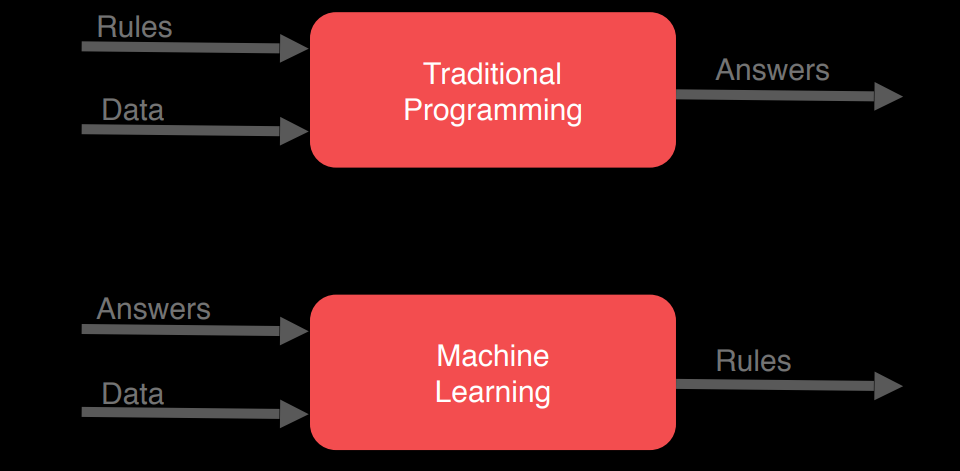

* Secondly, this week showed how to use a single layer neural network as a hello world to deep learning. following is the code:

Imagine that house pricing is as easy as:

A house has a base cost of 50k, and every additional bedroom adds a cost of 50k. This will make a 1 bedroom house cost 100k, a 2 bedroom house cost 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import numpy as np

In [2]:
xs = np.array([1,2,3,4,5,6], dtype='float')
ys = np.array([1,1.5,2,2.5,3,3.5], dtype='float')

In [3]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=[1])])

In [4]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [5]:
model.fit(xs,ys,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 293ms/step - loss: 17.8957
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 8.3385
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.9147
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.8669
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.9187
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4794
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2757
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1810
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1368
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1160
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1060
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1009
Epoch 13/1000
1/1 [=========================

In [6]:
model.predict([7])

1/1 [==============================] - 0s 110ms/step


array([[4.0121393]], dtype=float32)

## **Week Two | Introduction To Computer Vision**
Welcome to week 2 of the course! In week 1 you learned all about how Machine Learning and Deep Learning is a new programming paradigm. This week you’re going to take that to the next level by beginning to solve problems of computer vision with just a few lines of code! Check out this conversation between Laurence and Andrew where they discuss it and introduce you to Computer Vision!

**Learning Objectives:**
* Use callback functions for tracking model loss and accuracy during training
* Make predictions on how the layer size affects network predictions and training speed
* Implement pixel value normalization to speed up network training
* Build a multilayer neural network for classifying the Fashion MNIST image dataset

Following is te code that summarizes what was covered in this week:

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
fmnist = tf.keras.datasets.fashion_mnist

In [9]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

What does these values look like? Let's print a training image (both as an image and a numpy array), and a training label to see. Experiment with different indices in the array. For example, also take a look at index 42. That's a different boot than the one at index 0

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

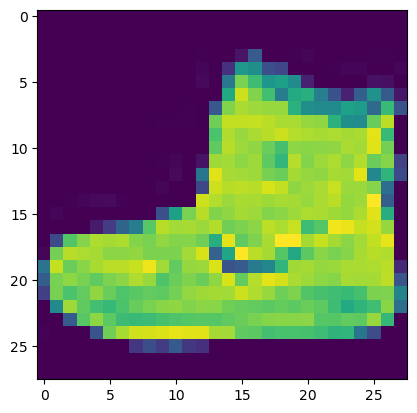

In [10]:
# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing

np.set_printoptions(linewidth=320)
# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [11]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [12]:
model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(units=128, activation='relu'),
                            tf.keras.layers.Dense(units=10, activation='softmax')
                            ])

In [13]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics='accuracy'
             )

In [14]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 2.4910 - accuracy: 0.0689


[2.491048812866211, 0.06889999657869339]

### Callbacks:


In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        '''
        Halts the training after reaching 60 percent accuracy

        Args:
          epoch (integer) - index of epoch (required but unused in the function definition below)
          logs (dict) - metric results from the training epoch
        '''

    # Check accuracy
        if(logs.get('loss') < 0.45):

      # Stop if threshold is met
            print("\nLoss is lower than 0.45 so cancelling training!")
            self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [16]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Train the model with a callback
model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4705 - accuracy: 0.8322
Epoch 2/20
1871/1875 [============================>.] - ETA: 0s - loss: 0.3576 - accuracy: 0.8706
Loss is lower than 0.45 so cancelling training!
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3575 - accuracy: 0.8706


Note that the labs had great exercises to build the intuition better.